<a href="https://colab.research.google.com/github/CharlesBourbeau/AI-Tic-Tac-Toe/blob/master/Comp551PreProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!ls

sample_data


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls

drive  sample_data


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [4]:
path = './drive/MyDrive/COMP551_Assignment3/comp-551-fall-2021/'

In [85]:
with open(f'{path}/images_ul.pkl', 'rb') as f:
    data = pickle.load(f)
data.shape

(30000, 56, 56)

In [92]:
def threshold(im, t):
    thresholded = np.copy(data)
    thresholded[data<60] = 0
    return thresholded

# median filtering for only one image
def median_filtering_2D(im):
    pad = np.pad(im, (1,1), mode='constant')
    res = np.empty(im.shape, dtype=im.dtype)

    R, C = im.shape
    for i in range(0, R):
        for j in range(0, C):
            ii, jj = i + 1, j + 1
            res[i, j] = np.median(pad[ii-1:ii+2, jj-1:jj+2])


    return res

# median filtering for all images at the same time
def median_filtering(data):
    rolled = np.moveaxis(data, 0, 2)
    pad = np.pad(rolled, ((1,1),(1,1), (0,0)), mode='constant', constant_values=0)

    res = np.empty(rolled.shape, dtype=rolled.dtype)

    R, C, _ = rolled.shape
    for i in range(0, R):
        for j in range(0, C):
            ii, jj = i + 1, j + 1
            res[i, j, :] = np.median(pad[ii-1:ii+2, jj-1:jj+2, :], axis=(0,1))

    return np.moveaxis(res, 2, 0)

# Filter the images and save then as pickle

In [97]:
files = [
         ('images_l.pkl', 'images_l_filtered.pkl', 0),
         ('images_test.pkl', 'images_test_filtered.pkl', 1),
         ('images_ul.pkl', 'images_ul_filtered.pkl', 2)
]

In [94]:
for original_fn, filtered_fn, _ in files:
    with open(f'{path}/{original_fn}', 'rb') as f:
        data = pickle.load(f)

    with open(f'{path}/{filtered_fn}', 'wb') as f:
        thresholded = threshold(data, t=60)
        filtered_data = median_filtering(thresholded)
        pickle.dump(filtered_data, f)

# Validate the filtering

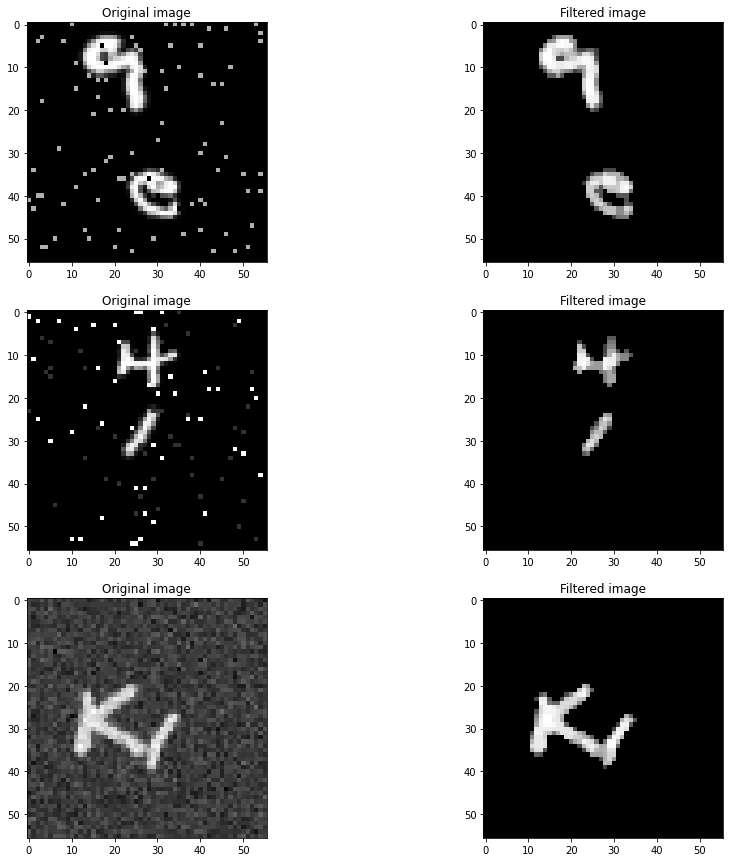

In [98]:
fig, axs = plt.subplots(len(files), 2, figsize=(15,15))
for ax, (original_fn, filtered_fn, image_idx) in zip(axs, files):
    with open(f'{path}/{original_fn}', 'rb') as f:
        data = pickle.load(f)

    with open(f'{path}/{filtered_fn}', 'rb') as f:
        filtered_data = pickle.load(f)

    ax[0].set_title('Original image')
    ax[0].imshow(data[image_idx], cmap='gray')
    ax[1].set_title('Filtered image')
    ax[1].imshow(filtered_data[image_idx], cmap='gray')

(1635.4635164710112, 2463.7658632430175)

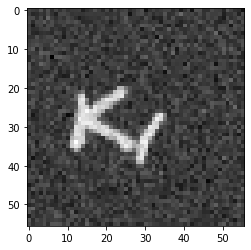

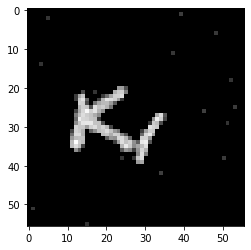

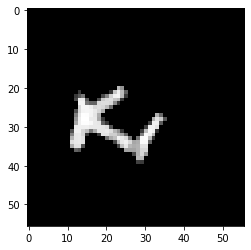

In [91]:
def threshold(im, t):
    im_ = np.copy(im)
    im_[im < t] = 0
    # im_[im >= t] = 255
    return im_

plt.imshow(data[2], cmap='gray')
plt.figure()
plt.imshow(thresholded[2], cmap='gray')
plt.figure()
plt.imshow(median_filtering_2D(threshold(data[2], 50)), cmap='gray')
np.var(data[3]), np.var(data[4])

In [86]:
thresholded = np.copy(data)
thresholded[data<60] = 0

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import pickle

In [6]:
with open(f'{path}/images_l.pkl', 'rb') as f:
    data = pickle.load(f)

with open(f'{path}/images_l_filtered.pkl', 'rb') as f:
    filtered_data = pickle.load(f)

In [7]:
with open(f'{path}/labels_l.pkl', 'rb') as f:
    labels = pickle.load(f)
labels.shape

(30000, 36)

In [7]:
N, *_ = data.shape
Xtrain = data[:int(0.8*N)]
Xvalid = data[-int(0.2*N):]
Xtrain.shape, Xvalid.shape

((24000, 56, 56), (6000, 56, 56))

In [8]:
x, y, z = filtered_data.shape
filtered_data = filtered_data.reshape((x, y * z))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(filtered_data, labels)
X_train.shape, y_train.shape

((22500, 3136), (22500, 36))

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(200, 200, 100, 100), verbose=True).fit(X_train, y_train)

Iteration 1, loss = inf
Iteration 2, loss = 7.91273010
Iteration 3, loss = 7.67660385
Iteration 4, loss = 7.51325314
Iteration 5, loss = 7.38597872
Iteration 6, loss = 7.27778562
Iteration 7, loss = 7.18224191
Iteration 8, loss = 7.08534572
Iteration 9, loss = 7.00464677
Iteration 10, loss = 6.90980370
Iteration 11, loss = 6.80998151
Iteration 12, loss = 6.71775645
Iteration 13, loss = 6.62146060
Iteration 14, loss = 6.51201273
Iteration 15, loss = 6.40610760
Iteration 16, loss = 6.30875507
Iteration 17, loss = 6.18748043
Iteration 18, loss = 6.08247304
Iteration 19, loss = 5.97376508
Iteration 20, loss = 5.85535759
Iteration 21, loss = 5.77302594
Iteration 22, loss = 5.67494109
Iteration 23, loss = 5.56298098
Iteration 24, loss = 5.45530182
Iteration 25, loss = 5.33154332
Iteration 26, loss = 5.24501635
Iteration 27, loss = 5.17842917
Iteration 28, loss = 5.08176447
Iteration 29, loss = 5.00689913
Iteration 30, loss = 4.86955700
Iteration 31, loss = 4.80829744
Iteration 32, loss = 4.7

In [32]:
model.score(X_train, y_train)

0.7831555555555556

In [25]:
model.predict_proba(X_train[:2])
labels[2]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

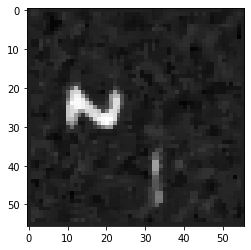

In [26]:
plt.imshow(X_train[2].reshape(56,56), cmap='gray')